In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader, Dataset, random_split
# Summary-like from Tensorflow
# from torchinfo import summary
# Import Numpy
import numpy as np
# Plot Import
import matplotlib.pyplot as plt
# For timer
import time
# Import OS
import os
from statistics import mean
# WFDB
import wfdb
# ==== LOCAL LIBS ====
import ecg_tools_lite as et
import evaluator as eva
import trainer as tr
import models as mod
# math
import math

In [2]:
# What are you trying to do?
create_new_model = True
create_new_res = True
# If create_new_model is True, epochs must have a value
epochs = 5
# If create_new_model is False, load_model_name must have a value
load_model_name = 'saved_model_dict.pt'
ecg_saved_res = 'res_pt_full.npy'
# Normalization option (either option 0 or 1)
norm_option = 2

In [4]:
# Denoised output from DAE
ecg_res = np.load( ecg_saved_res )
ecg_noisy = torch.from_numpy(np.load('all_none_fs1024_e06.npy')).double()
ecg_clean = torch.from_numpy(np.load('all_none_fs1024_e24.npy')).double()
# Acquire original shape
x = ecg_noisy.shape[0]
y = ecg_noisy.shape[2]
z = ecg_noisy.shape[1]
# Load reference signals
ecg_noisy = torch.reshape( ecg_noisy, (x, y, z))
ecg_clean = torch.reshape( ecg_clean, (x, y, z))
# normalize both
ecg_noisy = et.norm_sig( ecg_noisy )
ecg_clean = et.norm_sig( ecg_clean )
# Flatten all three ecg signals
ecg_noisy = ecg_noisy.flatten()
ecg_clean = ecg_clean.flatten()
ecg_res = ecg_res.flatten()

In [6]:
eva.get_snr_imp( ecg_clean=ecg_clean, ecg_noisy=ecg_noisy, ecg_denoised=ecg_res)

SNR_IN: 3.59124662041838
SNR_out: 6.865830098642491 


3.274583478224111

In [5]:
eva.get_snr_imp( ecg_clean=ecg_clean, ecg_noisy=ecg_noisy, ecg_denoised=ecg_res)

SNR_IN: 3.59124662041838
SNR_out: 6.865830098642491 


3.274583478224111

<Figure size 1440x576 with 0 Axes>

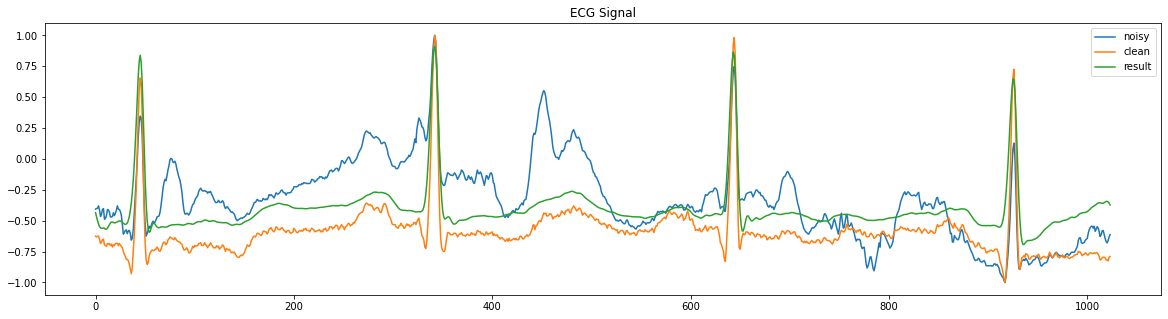

In [7]:
et.ecg_plot([ecg_noisy, ecg_clean, ecg_res], ['noisy', 'clean', 'result'])